In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("data_to_MF/smiles_list_all.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,CN(C)c1ccc(-c2cc(N(C)C)ccc2-c2cc(-c3cocn3)c3[n...,E
1,CN(C)c1ccc(-c2ccc(C(=O)c3cccn3C)cc2-c2c3ncoc3c...,E
2,CN(C)c1ccc(-c2cc(N(C)CN3c4ccccc4Sc4ccccc43)ccc...,E
3,CN(C)c1ccc(P(c2ccccc2)c2ccccc2-c2cc3sccc3s2)cc1,E
4,CN(C)c1ccc(-n2c3ccccc3c3cnccc32)cc1N1c2ccccc2N...,E
...,...,...
75853,Cn1cnc2ccc([SH]3C=CC=C3C=C(C#N)C#N)cc21,e=1
75854,COc1cc(OC)cc(-c2cncc(-c3cccnc3)c2)c1,e=1
75855,N#CC(C#N)=C1C(=Cc2ccc(-c3ccccc3C(=O)C(F)(F)F)c...,e=1
75856,CNc1cc(-c2ccc3c(c2)C(=O)C=CC3=O)cc(-c2c(F)c(F)...,e=1


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
df

(75858, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75855,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,8.773285,-1.225297
1,5.562293,-0.790304
2,11.579866,-2.856465
3,10.335476,-0.175034
4,13.215289,-1.402007
...,...,...
75853,2.757280,-2.148949
75854,11.927909,1.797799
75855,-2.432590,-0.157373
75856,10.101191,0.983661


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,8.773285,-1.225297,E
1,5.562293,-0.790304,E
2,11.579866,-2.856465,E
3,10.335476,-0.175034,E
4,13.215289,-1.402007,E


In [6]:
MF_umap_E = df_umap[df_umap['made_by'] == 'E']
MF_umap_e1 = df_umap[df_umap['made_by'] == 'e=1']

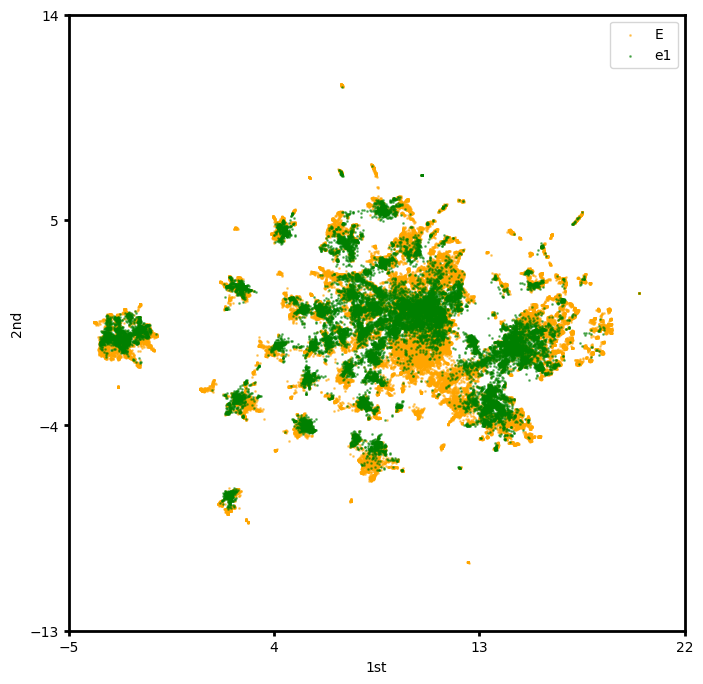

In [7]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_E['UMAP_0'], MF_umap_E['UMAP_1'], color='orange', label='E', s=1, alpha=0.5)
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 22)
plt.ylim(-13, 14)
plt.xticks(np.arange(-5, 23, 9))
plt.yticks(np.arange(-13, 15, 9))
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend()
plt.show()